In [14]:
import seaborn as sns
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv(r'C:\Users\Orxan\OneDrive\Desktop\Python\heart_disease_dataset.csv', delimiter=";" ) 

In [16]:
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [17]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [18]:
df.shape


(303, 14)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [20]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [21]:
df = df.dropna()  # Remove any rows with missing values

In [23]:
X = df.iloc[:, :-1].values  # Extract the features
y = df.iloc[:, -1].values  # Extract the target variable


In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scale the features

In [25]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Encode the target variable

In [26]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [51]:
%config IPcompleter.use_jedi=False

In [53]:
class ArtificialNeuralNetwork:
    def __init__(self, x, y):
        self.IN      = x
        #initialize weights with random values
        self.W1   = np.random.rand(self.IN.shape[1],4) 
        self.W2   = np.random.rand(6,4)                 
        self.y          = y
        self.OUT     = np.zeros(self.y.shape)
        self.learning_rate = 0.3

### Activation Function - Sigmoid 

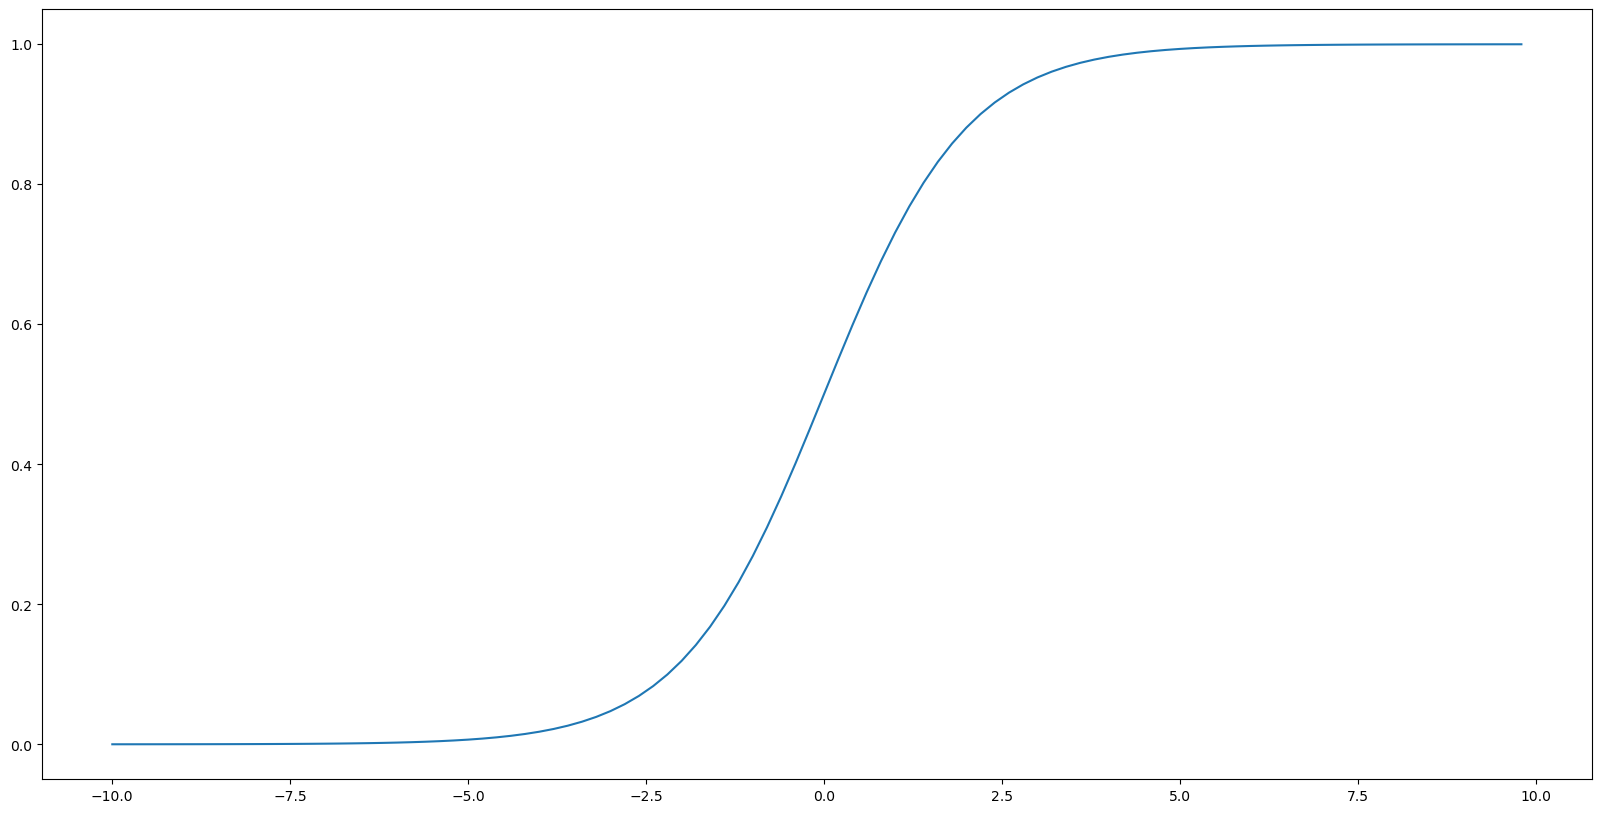

In [54]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.figure(figsize=(20,10))
plt.plot(x, sig)
plt.show()

In [55]:
def sigmoid_derivative(x):
    return x * (1.0 - x)

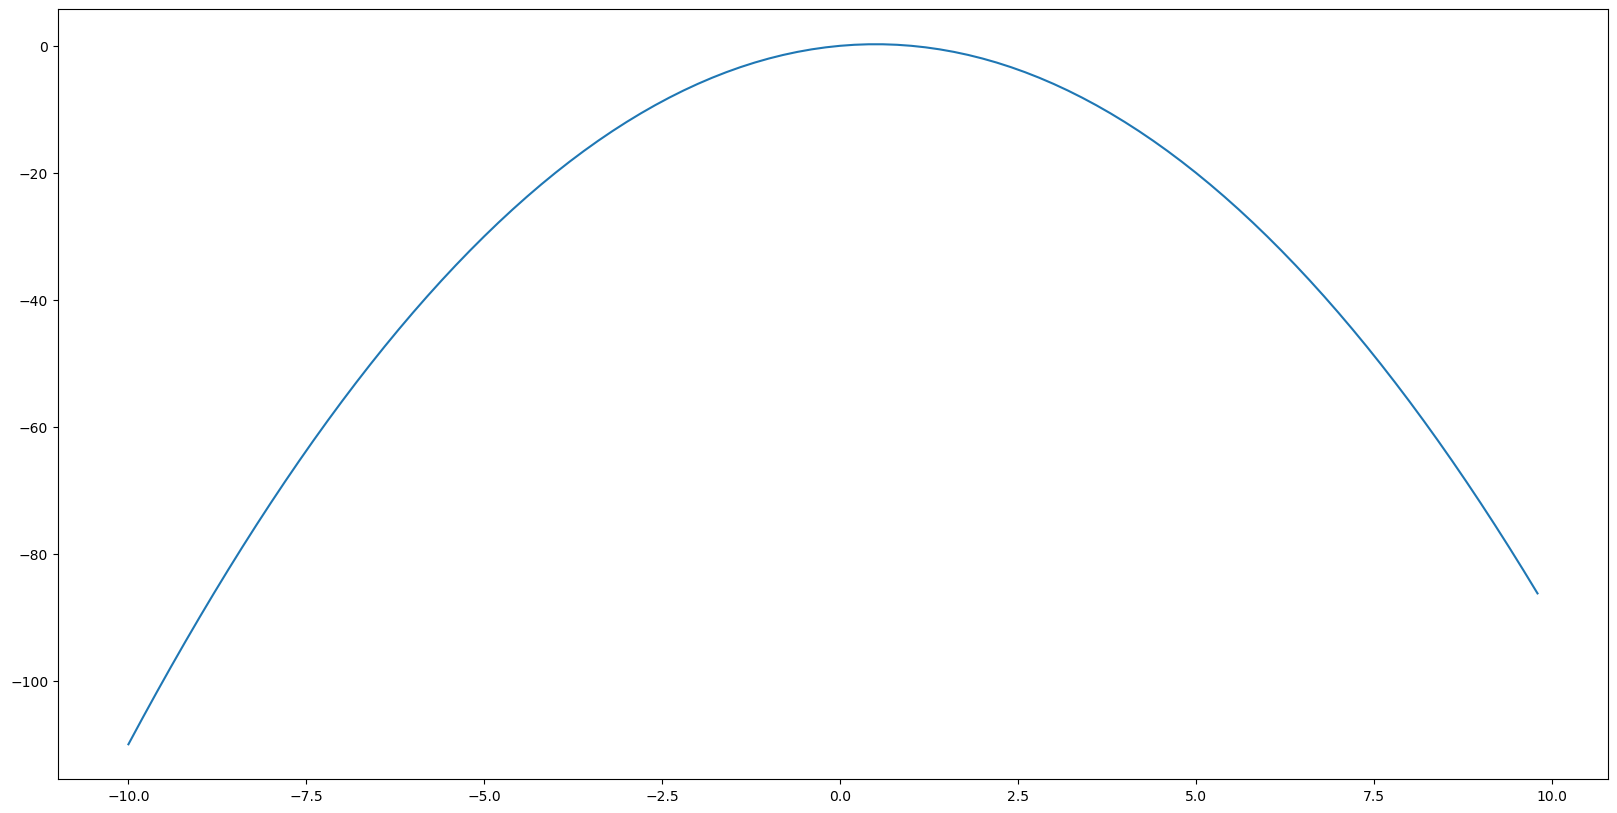

In [56]:
x = np.arange(-10., 10., 0.2)
sig = sigmoid_derivative(x)
plt.figure(figsize=(20,10))
plt.plot(x, sig)
plt.show()

### Loss function - Mear Squared Error:


In [57]:
def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

def mse_loss_derivative(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return (2*(y_true - y_pred))

In [58]:
def feed_forward(self):
    self.HIDDEN_LAYER_1 = sigmoid(np.dot(self.IN, self.W1))
    self.output = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2))

In [59]:
def d_W2(self):
    d_W2 = np.dot(self.HIDDEN_LAYER_1.T, (mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output)))

In [60]:
def back_propagate(self):
    # application of the chain rule to find derivative of the loss function with respect to W2 and W1
    print(self.HIDDEN_LAYER_1.T)
    d_W2 = np.dot(self.HIDDEN_LAYER_1.T, (mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output)))
    print(d_W2)
    d_W1 = np.dot(self.IN.T,  (np.dot(mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W2.T) * sigmoid_derivative(self.HIDDEN_LAYER_1)))

    # update the weights with the derivative (slope) of the loss function
    self.W1 += self.learning_rate*d_W1
    self.W2 += self.learning_rate*d_W2

 ### Putting it all together

In [61]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

def mse_loss_derivative(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return (2*(y_true - y_pred))

class ArtificialNeuralNetwork:
    def __init__(self, x, y):
        self.IN      = x
        self.W1   = np.random.rand(self.IN.shape[1],4) 
        self.W2   = np.random.rand(4,1)                 
        self.y          = y
        self.OUT     = np.zeros(self.y.shape)
        self.learning_rate = 0.3

    def feed_forward(self):
        self.HIDDEN_LAYER_1 = sigmoid(np.dot(self.IN, self.W1))
        self.output = sigmoid(np.dot(self.HIDDEN_LAYER_1, self.W2))

    def back_propagate(self):
        # application of the chain rule to find derivative of the loss function with respect to W2 and W1
        print(self.HIDDEN_LAYER_1.T)
        d_W2 = np.dot(self.HIDDEN_LAYER_1.T, (mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output)))
        print(d_W2)
        d_W1 = np.dot(self.IN.T,  (np.dot(mse_loss_derivative(self.y, self.output) * sigmoid_derivative(self.output), self.W2.T) * sigmoid_derivative(self.HIDDEN_LAYER_1)))

        # update the weights with the derivative (slope) of the loss function
        self.W1 += self.learning_rate*d_W1
        self.W2 += self.learning_rate*d_W2

    def train(self, epochs,learning_rate):
        self.learning_rate=learning_rate
        for i in range(epochs):
            self.feed_forward()
            self.back_propagate()
        print("Successfully Trained the Model")
        print("Weights 1:", self.W1)
        print("Weights 2:", self.W2)
    
    def print_output(self):
        print(self.output)

In [62]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
y = np.array([[0],[1],[1],[0]])
epochs = 2
learning_rate = 0.5
ann = ArtificialNeuralNetwork(X,y)
ann.train(epochs, learning_rate)

[[0.61884092 0.80927506 0.70759971 0.86347179]
 [0.71371629 0.81466146 0.85713877 0.91363214]
 [0.61825361 0.79537847 0.68186264 0.83724336]
 [0.65362666 0.78770736 0.81997427 0.89955727]]
[[-0.26837668]
 [-0.29609855]
 [-0.26464679]
 [-0.28056305]]
[[0.61254805 0.80408453 0.70087962 0.85881417]
 [0.71040433 0.8117917  0.85477783 0.91188915]
 [0.61792497 0.79508652 0.68148508 0.83695146]
 [0.64848395 0.78321064 0.81597597 0.8967304 ]]
[[-0.27695884]
 [-0.30567941]
 [-0.2751494 ]
 [-0.2893879 ]]
Successfully Trained the Model
Weights 1: [[0.38889964 0.87298491 0.28067868 0.87354858]
 [0.94799278 0.5625282  0.87615588 0.66907041]
 [0.43571864 0.88521291 0.48414387 0.59394039]]
Weights 2: [[ 0.4991635 ]
 [ 0.26799246]
 [-0.2311524 ]
 [ 0.43370756]]


In [63]:
ann.print_output()

[[0.73239501]
 [0.7743353 ]
 [0.77115048]
 [0.79765779]]
